## 비트코인 가격 분석
#### #01. 작업준비
패키지 참조

In [4]:
import sys
sys.path.append("../../")

import pyupbit
import datetime as dt
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb

from helper import set_datetime_index, exp_time_data

#### #02 pyupbit 패키지 사용
조회 가능한 단위 목록
> ###### KRW : 한국화폐
> ###### BTC : Bitcoin
> ###### ETH : 이더리움

In [5]:
print(pyupbit.get_tickers())

['KRW-BTC', 'KRW-ETH', 'BTC-ETH', 'BTC-XRP', 'BTC-ETC', 'BTC-CVC', 'BTC-DGB', 'BTC-SC', 'BTC-SNT', 'BTC-WAVES', 'BTC-NMR', 'BTC-XEM', 'BTC-QTUM', 'BTC-BAT', 'BTC-LSK', 'BTC-STEEM', 'BTC-DOGE', 'BTC-BNT', 'BTC-XLM', 'BTC-ARDR', 'BTC-ARK', 'BTC-STORJ', 'BTC-GRS', 'BTC-RLC', 'USDT-BTC', 'USDT-ETH', 'USDT-XRP', 'USDT-ETC', 'KRW-NEO', 'KRW-MTL', 'KRW-XRP', 'KRW-ETC', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-ADA', 'BTC-ADA', 'BTC-MANA', 'KRW-SBD', 'BTC-SBD', 'KRW-POWR', 'BTC-POWR', 'KRW-BTG', 'USDT-ADA', 'BTC-DNT', 'BTC-ZRX', 'BTC-TRX', 'BTC-TUSD', 'BTC-LRC', 'KRW-ICX', 'KRW-EOS', 'USDT-TUSD', 'KRW-TRX', 'BTC-POLYX', 'USDT-SC', 'USDT-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLYX', 'KRW-ZRX', 'KRW-LOOM', 'BTC-BCH', 'USDT-BCH', 'KRW-BCH', 'BTC-HIFI', 'BTC-LOOM', 'KRW-BAT', 'KRW-IOST', 'BTC-RFR', 'KRW-RFR', 'USDT-DGB', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'BTC-RVN', 'BTC-GO', 'BTC-UPP', 'BTC-ENJ', 'KRW-H

특정 단어를 포함하는 조회 가능 목록만 가져오기

In [6]:
print(pyupbit.get_tickers(fiat='KRW'))

['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-XRP', 'KRW-ETC', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLYX', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-RFR', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-HIFI', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-ENJ', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PLA', 'KRW-DOT', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 'KRW-SSX', 'KRW-META', 'KRW-FCT2', 'KRW-CB

현재 시세 가져오기
###### 조회하고자 하는 단위의 이름을 리스트로 설정한다.

In [7]:
pyupbit.get_current_price(["KRW-BTC", "KRW-ETH"])

{'KRW-BTC': 38598000.0, 'KRW-ETH': 2434000.0}

#### 특정 기간에 대한 시세 데이터 가져오기
###### 비트코인의 한국 화폐단위(KRW-BTC) 데이터를 오늘 날짜부터 500일간 일 단위(day)로 조회
###### 조회간격 단위: minute1, minute3, minute5, minute10, minute15, minute30, minute60, minute240, day, week, month

|필드|설명|
|--|--|
|open|시가|
|high|고가|
|low|저가|
|close|종가|
|volume|거래량|
|value|거래량을 지정된 화폐 단위로 환산한 가치|

In [8]:
ticker = 'KRW-BTC'
to = dt.datetime.now().strftime('%Y-%m-%d')
count = 500
interval = 'day'
df = pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to,count=count)
df.head()

,open,high,low,close,volume,value
2022-03-25 09:00:00,52907000.0,54450000.0,52700000.0,53791000.0,5670.827515,3.038154e+11
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11


#### #03. 데이터 전처리
시세가격에 대한 파생변수 추가
###### 최고가와 최저가의 평균을 그날의 시세가격으로 삼기로 결정하고 데이터 전처리를 수행

In [10]:
df['price'] = (df['high'] + df['low']) / 2
df.head()

,open,high,low,close,volume,value,price
2022-03-25 09:00:00,52907000.0,54450000.0,52700000.0,53791000.0,5670.827515,3.038154e+11,53575000.0
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11,53821500.0
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11,54937500.0
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11,56752500.0
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11,56965000.0


인덱스에 대한 날짜 형식 지정

In [11]:
set_datetime_index(df, inplace=True)

#### #04. 데이터 검정
###### 이상치는 보이지만 데이터 자체가 실제 거래 데이터이므로 정상 데이터로 판단함

결측치 수: 0


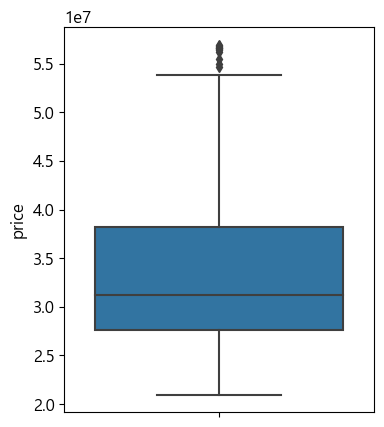

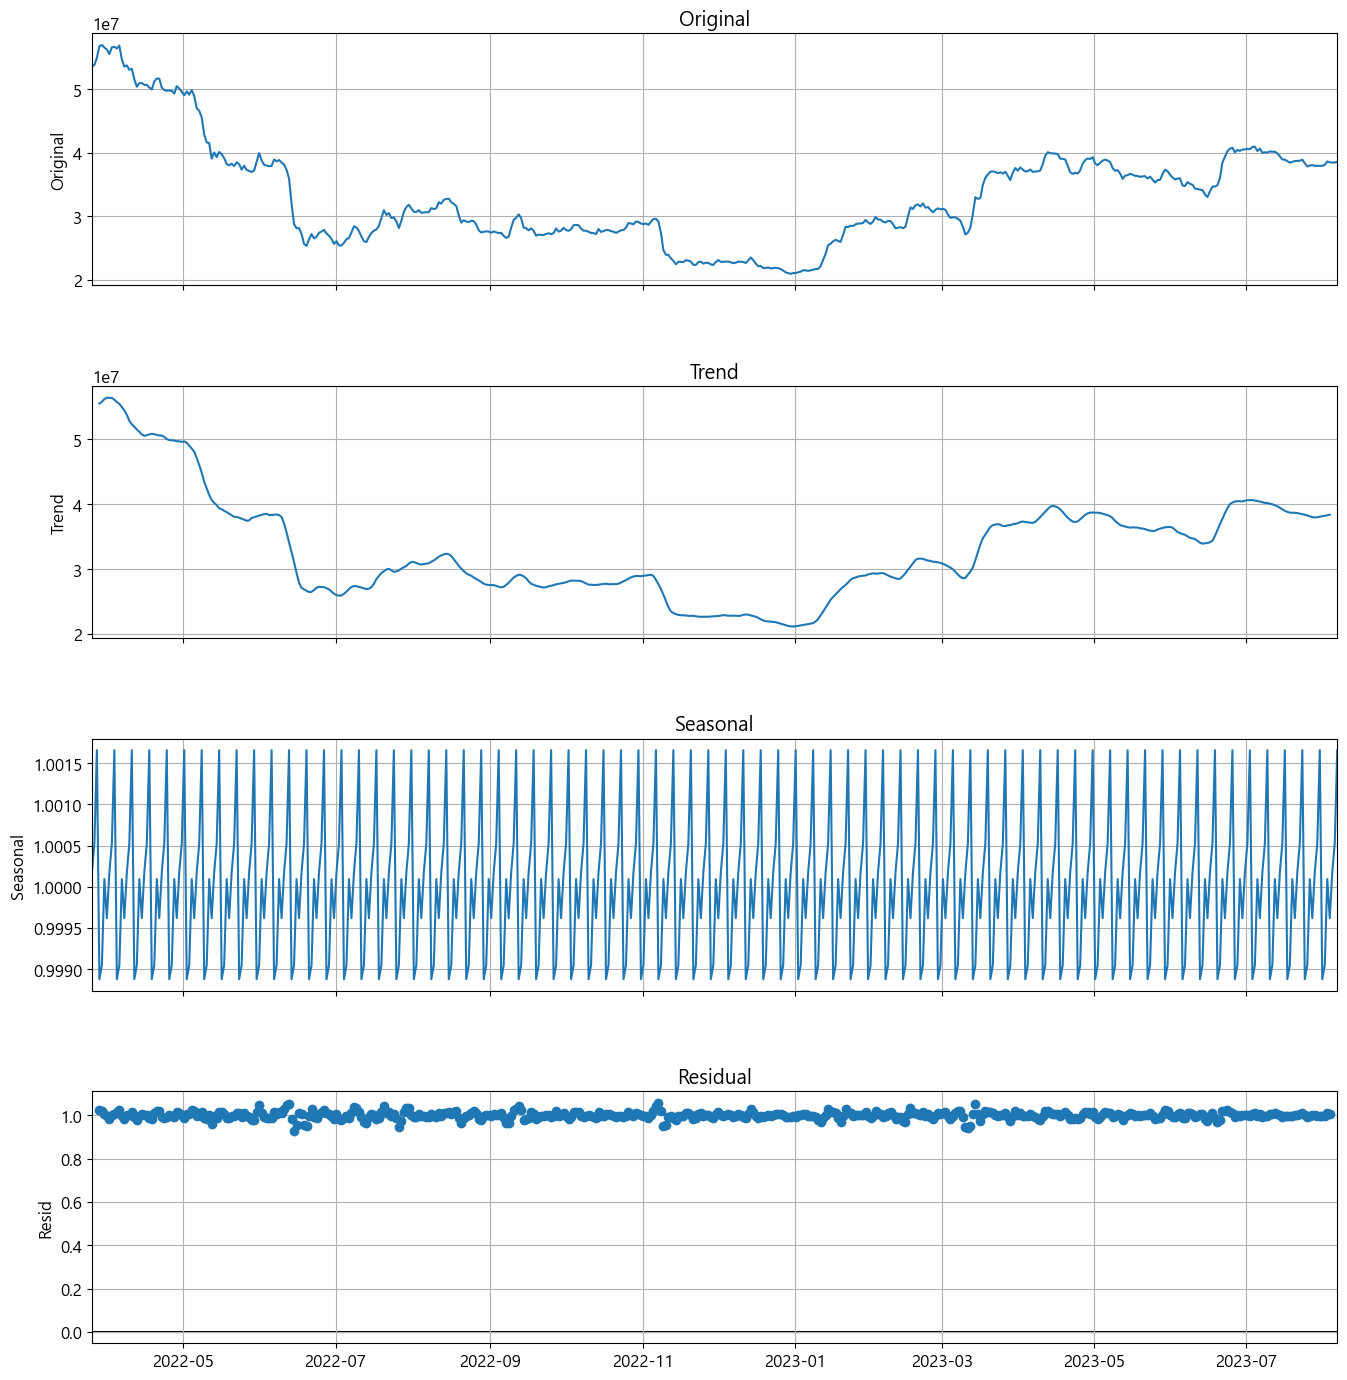

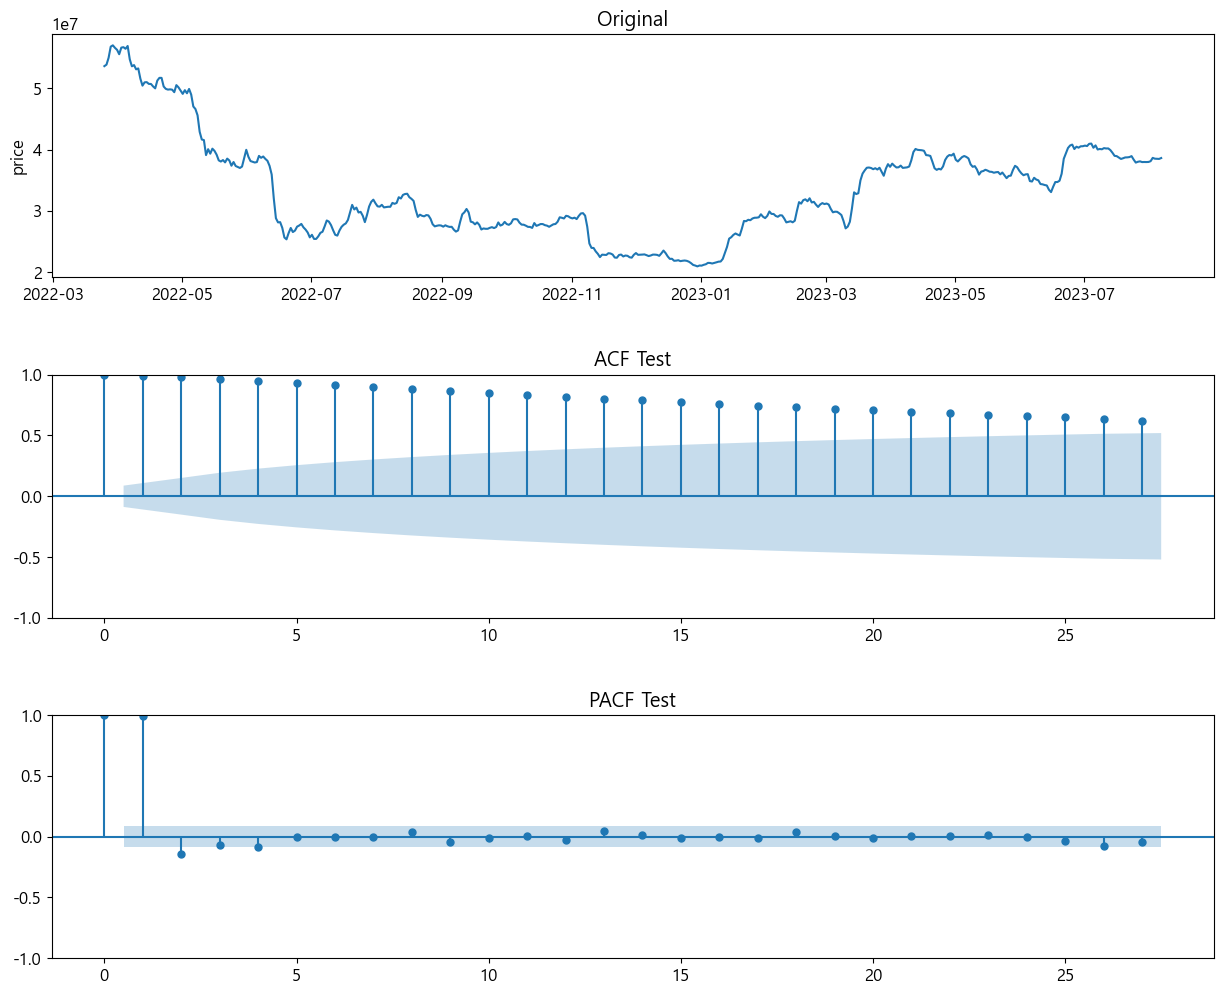

=========== 원본 데이터 ===========
+------------------------------------+-----------+
| ADF Test                           |           |
|------------------------------------+-----------|
| 검정통계량(ADF Statistic)          |  -3.07508 |
| 유의수준(p-value)                  | 0.0284529 |
| 최적차수(num of lags)              |         3 |
| 관측치 개수(num of observations)   |       496 |
| 기각값(Critical Values) 1%         |   -3.4436 |
| 기각값(Critical Values) 5%         |  -2.86738 |
| 기각값(Critical Values) 10%        |  -2.56988 |
| 데이터 정상성 여부(0=Flase,1=True) |         1 |
+------------------------------------+-----------+


In [12]:
exp_time_data(df, 'price', "m")

#### #04. ARIMA 분석
분석 모델 구축

In [13]:
model = ARIMA(df['price'], order=(1,0,0), seasonal_order=(1,1,0,7))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                           price   No. Observations:                  500
Model:             ARIMA(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood               -8044.773
Date:                         Mon, 07 Aug 2023   AIC                          16095.545
Time:                                 12:06:59   BIC                          16108.147
Sample:                             03-25-2022   HQIC                         16100.493
                                  - 08-06-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6069      0.002    359.813      0.000       0.604       0.610
ar.S.L7       -0.2590      0.002   -112.625      0.000     

분석 모델에 대한 예측치

In [14]:
fv = fit.fittedvalues
fv.head()

2022-03-25 09:00:00    0.000000e+00
2022-03-26 09:00:00    3.207295e+07
2022-03-27 09:00:00    3.193289e+07
2022-03-28 09:00:00    3.212577e+07
2022-03-29 09:00:00    3.240832e+07
Freq: D, dtype: float64

향후 30일간의 데이터 예측

In [15]:
fc = fit.forecast(30)
fc.head()

2023-08-07 09:00:00    3.831736e+07
2023-08-08 09:00:00    3.818717e+07
2023-08-09 09:00:00    3.856191e+07
2023-08-10 09:00:00    3.844897e+07
2023-08-11 09:00:00    3.837836e+07
Freq: D, Name: predicted_mean, dtype: float64

시각화

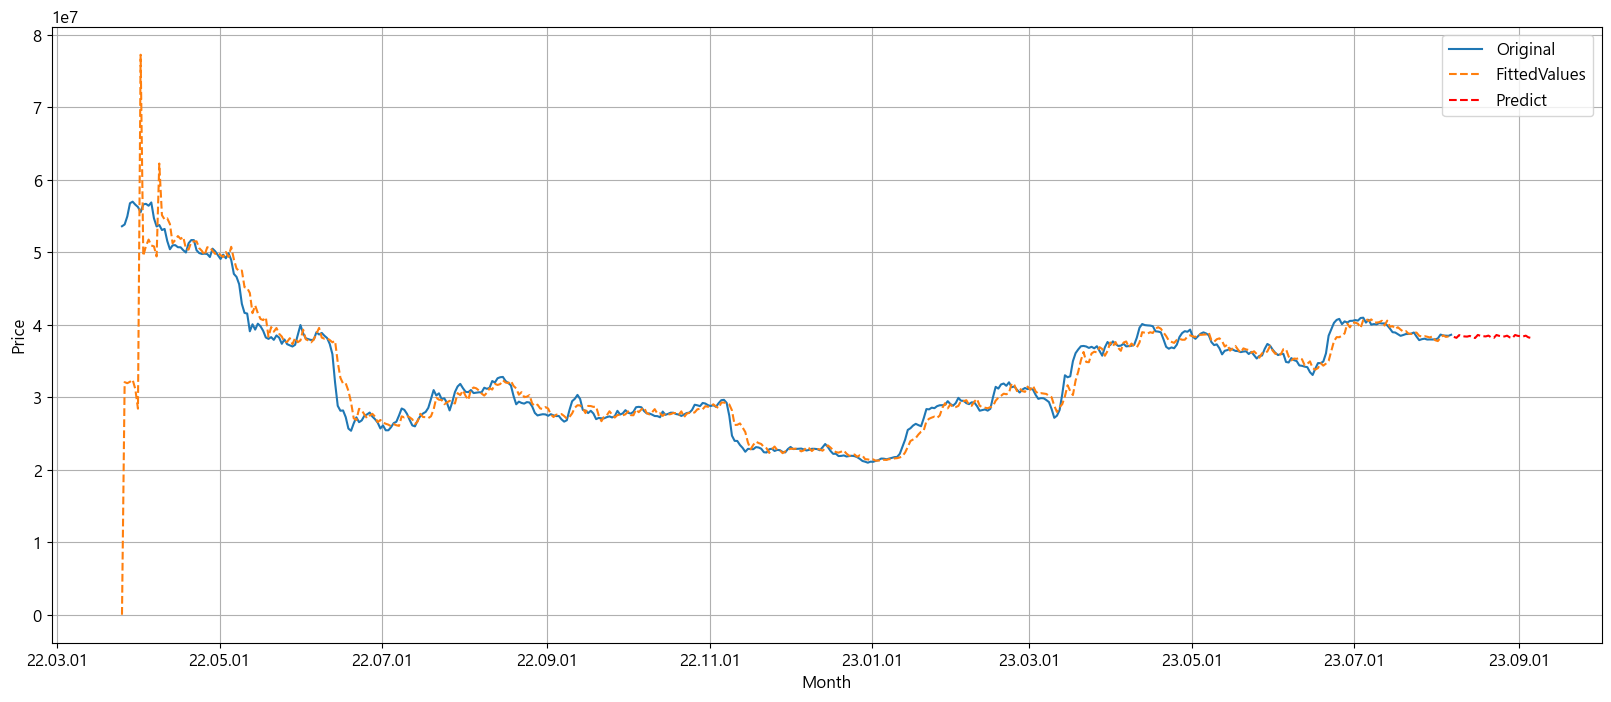

In [16]:
plt.figure(figsize=(20,8))

sb.lineplot(data=df, x=df.index, y='price', label='Original')
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

#### #05.AutoARIMA 사용
분석모델 구축

In [17]:
my_p = 1    # AR의 차수 (검증한 결과를 활용)
my_d = 1    # 차분 횟수 (검증한 결과를 활용)
my_q = 0    # MA의 차수 (검증한 결과를 활용)
my_s = 7    # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y=df['price'],       # 모델링하려는 시계열 데이터 또는 배열
    start_p=0,           # p의 시작점
    max_p=my_p,          # p의 최대값
    d=my_d,              # 차분 횟수
    start_q=0,           # q의 시작점
    max_q=my_q,          # q의 최대값
    seasonal=True,       # 계절성 사용 여부
    m=my_s,              # 계절성 주기
    start_P=0,           # P의 시작점
    max_P=my_p,          # P의 최대값
    D=my_d,              # 계절성 차분 횟수
    start_Q=0,           # Q의 시작점
    max_Q=my_q,          # Q의 최대값
    trace=True           # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=14956.004, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=14929.788, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=14957.743, Time=0.04 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=14949.560, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[7] intercept   : AIC=14931.767, Time=0.16 sec

Best model:  ARIMA(1,1,0)(1,1,0)[7]          
Total fit time: 0.510 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  500
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -7461.894
Date:                           Mon, 07 Aug 2023   AIC                          14929.788
Time:                                   12:08:11   BIC                          14942.384
Sample:                               03-25-2022   HQIC                         14934.734
     

잔차 분석

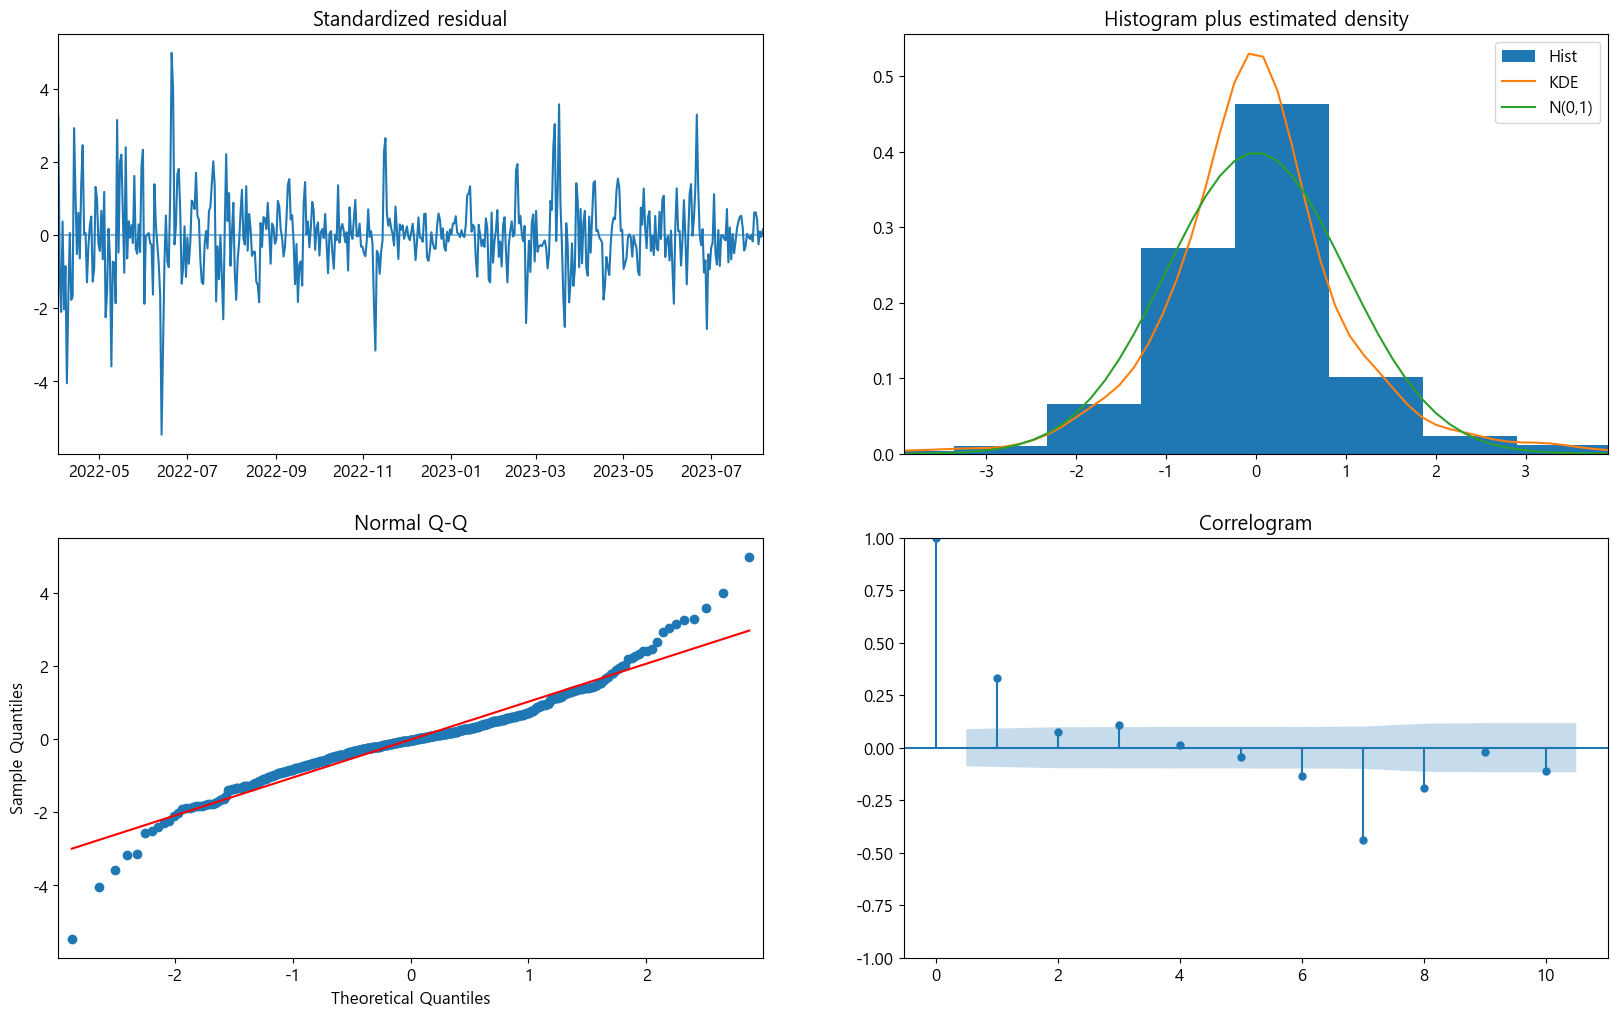

In [18]:
model.plot_diagnostics(figsize=(20, 12))
plt.show()

학습 결과에 대한 예측값

In [19]:
fv = model.fittedvalues()
fv.head()

2022-03-25 09:00:00    0.000000e+00
2022-03-26 09:00:00    5.582250e+07
2022-03-27 09:00:00    5.383184e+07
2022-03-28 09:00:00    5.498430e+07
2022-03-29 09:00:00    5.682831e+07
Freq: D, dtype: float64

향후 30일간의 시세 예측

In [20]:
fc = model.predict(n_periods=30)
fc.head()

2023-08-07 09:00:00    3.858298e+07
2023-08-08 09:00:00    3.865642e+07
2023-08-09 09:00:00    3.916127e+07
2023-08-10 09:00:00    3.904907e+07
2023-08-11 09:00:00    3.901622e+07
Freq: D, dtype: float64

시각화

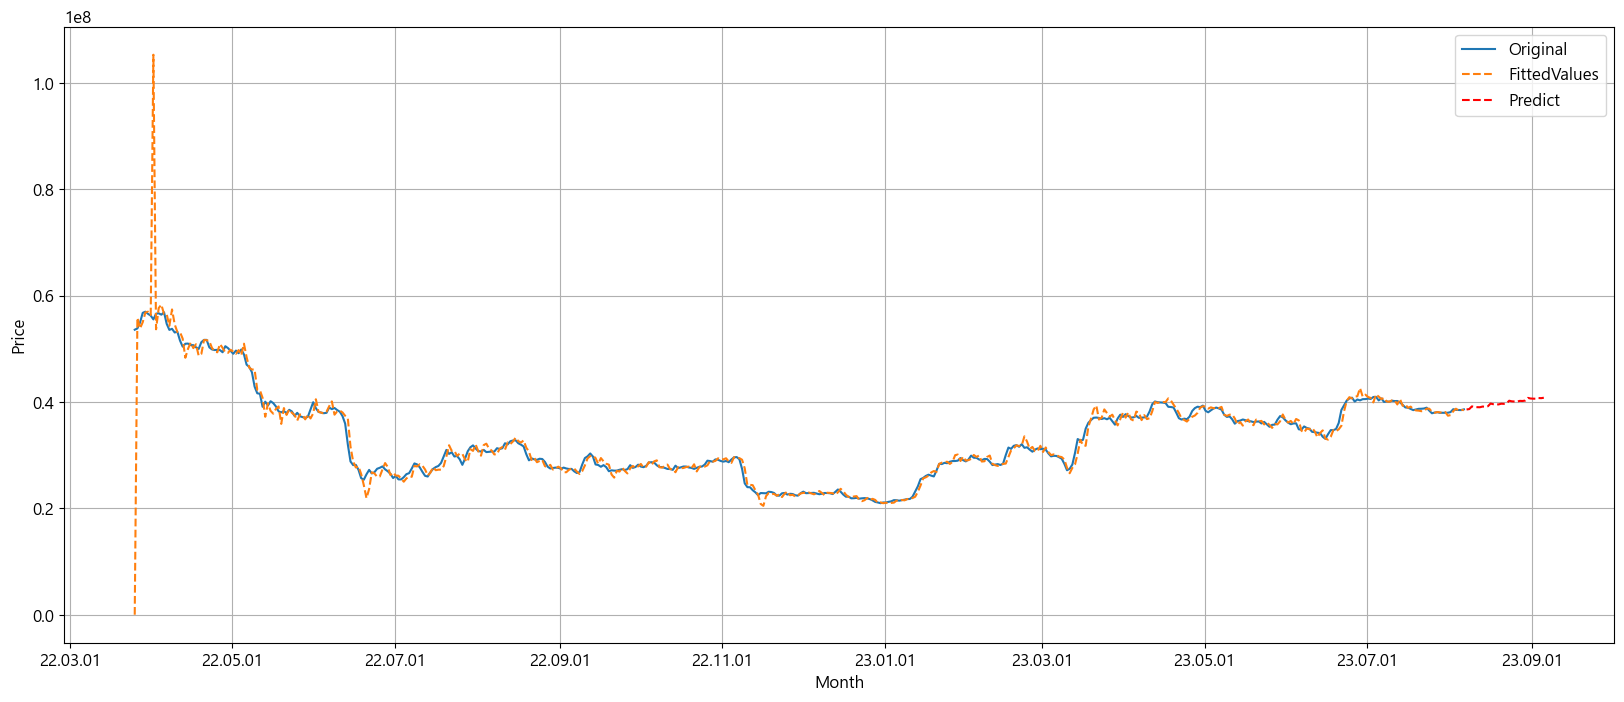

In [21]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()